In [3]:
import pandas as pd

In [4]:
teams = pd.read_csv("teams.csv")

In [5]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [6]:
teams = teams[["team", "country", "year", "age", "athletes", "prev_medals", "medals"]]

In [7]:
teams

,team,country,year,age,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,22.0,8,0.0,0
1,AFG,Afghanistan,1968,23.2,5,0.0,0
2,AFG,Afghanistan,1972,29.0,8,0.0,0
3,AFG,Afghanistan,1980,23.6,11,0.0,0
4,AFG,Afghanistan,2004,18.6,5,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,25.0,26,0.0,0
2140,ZIM,Zimbabwe,2004,25.1,14,0.0,3
2141,ZIM,Zimbabwe,2008,26.1,16,3.0,4
2142,ZIM,Zimbabwe,2012,27.3,9,4.0,0


In [10]:
 teams.select_dtypes(include=['number']).corr()["medals"]

year          -0.021603
age            0.025096
athletes       0.840817
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [11]:
import seaborn as sns

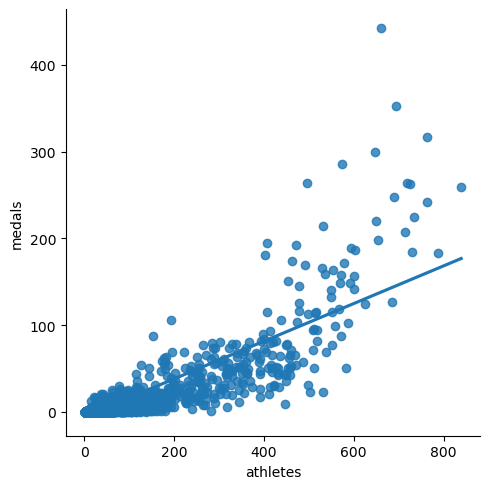

In [12]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

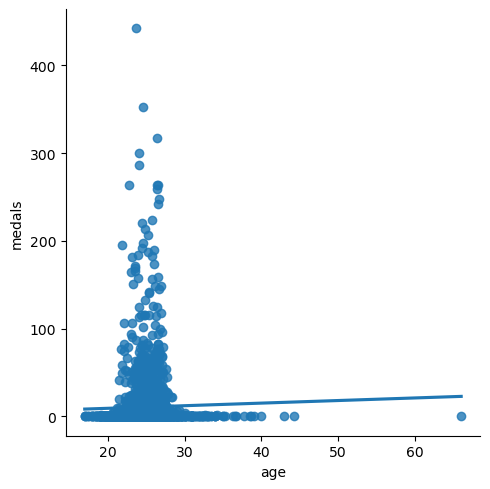

In [13]:
sns.lmplot(x="age", y="medals",data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

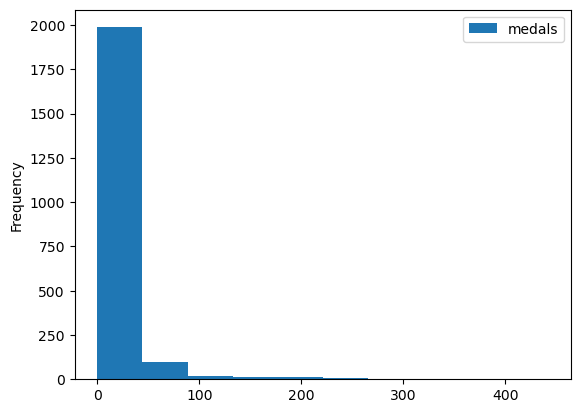

In [15]:
teams.plot.hist(y="medals")

In [16]:
teams[teams.isnull().any(axis=1)]

,team,country,year,age,athletes,prev_medals,medals
19,ALB,Albania,1992,25.3,9,NaN,0
26,ALG,Algeria,1964,26.0,7,NaN,0
39,AND,Andorra,1976,28.3,3,NaN,0
50,ANG,Angola,1980,17.4,17,NaN,0
59,ANT,Antigua and Barbuda,1976,23.2,17,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,20.5,6,NaN,0
2103,YAR,North Yemen,1984,27.7,3,NaN,0
2105,YEM,Yemen,1992,19.6,8,NaN,0
2112,YMD,South Yemen,1988,23.6,5,NaN,0


In [17]:
teams = teams.dropna()

In [18]:
teams

,team,country,year,age,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,22.0,8,0.0,0
1,AFG,Afghanistan,1968,23.2,5,0.0,0
2,AFG,Afghanistan,1972,29.0,8,0.0,0
3,AFG,Afghanistan,1980,23.6,11,0.0,0
4,AFG,Afghanistan,2004,18.6,5,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,25.0,26,0.0,0
2140,ZIM,Zimbabwe,2004,25.1,14,0.0,3
2141,ZIM,Zimbabwe,2008,26.1,16,3.0,4
2142,ZIM,Zimbabwe,2012,27.3,9,4.0,0


In [19]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [20]:
train.shape

(1609, 7)

In [21]:
test.shape

(405, 7)

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [23]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [24]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [25]:
predictions = reg.predict(test[predictors])

In [27]:
test["predictions"] = predictions

In [28]:
test

,team,country,year,age,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,24.8,6,1.0,1,-0.961221
7,AFG,Afghanistan,2016,24.7,3,1.0,0,-1.176333
24,ALB,Albania,2012,25.7,10,0.0,0,-1.425032
25,ALB,Albania,2016,23.7,6,0.0,0,-1.711847
37,ALG,Algeria,2012,24.8,39,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,19.3,3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,22.6,7,0.0,0,-1.640143
2132,ZAM,Zambia,2016,24.1,7,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,27.3,9,4.0,0,1.505767


In [29]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [30]:
test["predictions"] = test["predictions"].round()

In [31]:
test

,team,country,year,age,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,24.8,6,1.0,1,0.0
7,AFG,Afghanistan,2016,24.7,3,1.0,0,0.0
24,ALB,Albania,2012,25.7,10,0.0,0,0.0
25,ALB,Albania,2016,23.7,6,0.0,0,0.0
37,ALG,Algeria,2012,24.8,39,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,19.3,3,0.0,0,0.0
2131,ZAM,Zambia,2012,22.6,7,0.0,0,0.0
2132,ZAM,Zambia,2016,24.1,7,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,27.3,9,4.0,0,2.0


In [32]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])

In [33]:
error 

3.2987654320987656

In [34]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [35]:
test[test["team"] == "USA"]

,team,country,year,age,athletes,prev_medals,medals,predictions
2053,USA,United States,2012,26.7,689,317.0,248,285.0
2054,USA,United States,2016,26.4,719,248.0,264,236.0


In [36]:
test[test["team"] == "IND"]

,team,country,year,age,athletes,prev_medals,medals,predictions
907,IND,India,2012,26.0,95,3.0,6,7.0
908,IND,India,2016,26.1,130,6.0,2,12.0


In [40]:
errors = (test["medals"] - test["predictions"]).abs()

In [41]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [42]:
error_by_team = errors.groupby(test["team"]).mean()

In [43]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [44]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [45]:
error_ratio = error_by_team / medals_by_team

In [46]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [47]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [49]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [50]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

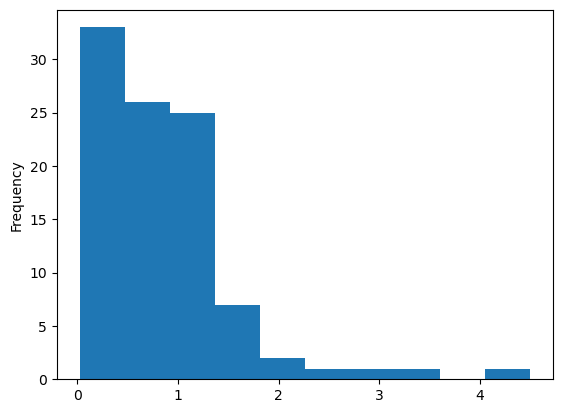

In [51]:
error_ratio.plot.hist()

In [52]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64